### Mine PubMed with Jupyter Notebooks

Visualisation and data mining of the public database of biomedical literature PubMed. The mining is performed with a series of queries from a Jupyter Notebook. This started with Matlab Functions in a parallel repository.

#### Reference
Reyes-Aldasoro CC (2017) The proportion of cancer-related entries in PubMed has increased considerably; is cancer truly “The Emperor of All Maladies”? PLoS ONE 12(3): e0173671. https://doi.org/10.1371/journal.pone.0173671

#### Abstract
In this work, the public database of biomedical literature PubMed was mined using queries with combinations of keywords and year restrictions. It was found that the proportion of Cancer-related entries per year in PubMed has risen from around 6% in 1950 to more than 16% in 2016. This increase is not shared by other conditions such as AIDS, Malaria, Tuberculosis, Diabetes, Cardiovascular, Stroke and Infection some of which have, on the contrary, decreased as a proportion of the total entries per year. 

First, import all the things you need to import.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

First we need to define a basic URL. And that will be the address of PubMed with a search term. This give entry to the database MEDLINE of the United States National Library of Medicine (NLM) and its search engine PubMed (https://www.ncbi.nlm.nih.gov/pubmed) have grown to include over 26 million entries: 26,710,394 on the 30 November 2016.

Then, we will define a series of keywords. In MEDLINE, each entry is indexed with Medical Subject Headings (MeSH) and various field descriptors such as author, date, title, publication type, etc. These fields allow specific searches to be performed in PubMed by restricting the search to one, several or all fields and logical combinations with operators such as AND, OR, NOT are available as well.

We will apply two keywords with an AND function to analyse which cancer-related terms are more commonly indexed in PubMed. 

In [2]:
# 0
#Basic keywords that describe cancer, concatenate
basicURL                = 'https://www.ncbi.nlm.nih.gov/pubmed/?term='


Now we define the keywords:

In [3]:
CancerKeyWords          = ['neoplasms','cancer','tumor','neoplasm','tumors','oncology',
                           'metastasis','cancers','tumour','tumours','neoplasia'];
numKeyWords             = len(CancerKeyWords)

combinedEntries         = np.zeros((len(CancerKeyWords),len(CancerKeyWords))) # disease (and total) and year


To instruct PubMed that we are querying the keywords,and because we will be going through a browser that does not interpret spaces and other symbols we will code like this

In [4]:
urlAddress                          = basicURL+'%22'+CancerKeyWords[1]+'%22'+'AND'+'%22'+CancerKeyWords[2]+'%22'
print(urlAddress)

https://www.ncbi.nlm.nih.gov/pubmed/?term=%22cancer%22AND%22tumor%22


Now we iterate. To find the actual number of entries, we look for the word **resultcount** and grab the number that is in between  **=** and **/**.

In [5]:
for counterKW1 in np.arange(0,numKeyWords):
    for counterKW2 in np.arange(counterKW1,numKeyWords):
        urlAddress                          = basicURL+'%22'+CancerKeyWords[counterKW1]+'%22'+'AND'+'%22'+CancerKeyWords[counterKW2]+'%22'
        with urllib.request.urlopen(urlAddress) as url:
                #f = urllib.request.urlopen.read(link)
                wholeURL = url.read().decode('utf-8')
                # Once the wholeURL is downloaded, search for the place where the total
                # number of entries in PubMed exist, this can be done with 2 codes, 
                # one is totalResults and the other is resultcount. This changed recently with 
                # the new page results from PubMed

                # find the code
                location_init = wholeURL.index('resultcount')
                # detect the limits of the result number itself, use = and / to limit
                location_2    = wholeURL.find('=',location_init,location_init+30)
                location_3    = wholeURL.find('/',location_2+1,location_2+30)
                # the actual number of entries
                combinedEntries[counterKW1,counterKW2] = wholeURL[location_2+2:location_3-2]

    

Sometimes it is useful to display the measurements we have mined:

In [6]:
print(combinedEntries)

[[2.677345e+06 1.402893e+06 9.435810e+05 5.809870e+05 4.644350e+05
  3.339120e+05 2.952460e+05 1.927740e+05 1.445890e+05 9.571800e+04
  4.793700e+04]
 [0.000000e+00 2.310529e+06 8.132340e+05 4.208590e+05 3.002070e+05
  4.183130e+05 2.401610e+05 2.211990e+05 1.012370e+05 5.500000e+04
  3.176300e+04]
 [0.000000e+00 0.000000e+00 1.696650e+06 3.673090e+05 3.935430e+05
  2.116800e+05 1.951260e+05 1.263870e+05 7.124100e+04 2.779300e+04
  2.143000e+04]
 [0.000000e+00 0.000000e+00 0.000000e+00 7.203860e+05 1.536940e+05
  1.169720e+05 1.916510e+05 6.055500e+04 5.386300e+04 3.117800e+04
  1.229300e+04]
 [0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 6.168110e+05
  9.018300e+04 7.936300e+04 5.826600e+04 1.001100e+04 8.554000e+03
  1.091700e+04]
 [0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  6.162500e+05 6.243500e+04 4.900100e+04 2.898000e+04 1.615500e+04
  5.879000e+03]
 [0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 3.637050e+05 3.634

Finally, let's display with a 3D bar plot:

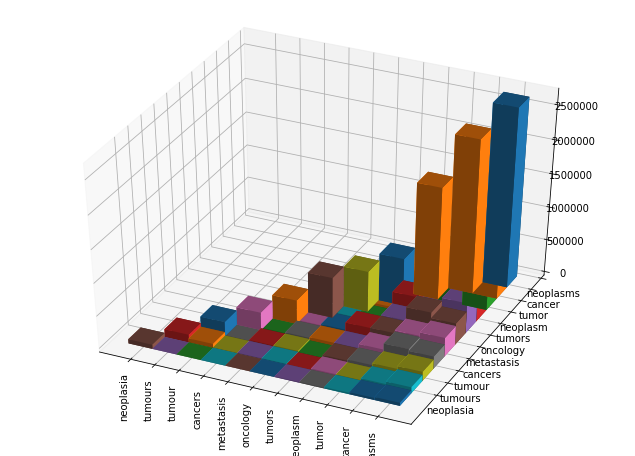

In [7]:
fig = plt.figure( figsize=(11, 8))
from mpl_toolkits.mplot3d import Axes3D 
ax = fig.add_subplot(111, projection='3d')
for i in np.arange(0,numKeyWords):
    currentColor = i/numKeyWords
    for j in np.arange(i,numKeyWords):
        #ax.bar3d(i,j,combinedEntries[i,j],[1,1,1],[1,1,1],[1,1,1],shade=True)
        ax.bar3d(i,j,0,1,1,(combinedEntries[i,j]),shade=True)
        #print(combinedEntries[i,j])
ax.view_init(40, 115)
ax.xaxis.set_ticks(0.5+np.arange(0,numKeyWords))
ax.yaxis.set_ticks(np.arange(0,numKeyWords)-0.5)
ax.xaxis.set_ticklabels((CancerKeyWords))
ax.yaxis.set_ticklabels((CancerKeyWords))   
ax.tick_params(axis='x', rotation=90)

The display of the bars with Matplotlib is not very good ... if you google around you will see lots and lots of complaints about this.

Matlab is much better for these type of plots and it is easier to manipulate them and produce a better final figure.